# 1- Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/fiverr/mission 19/amz.csv", encoding='latin-1', delimiter=',')

In [3]:
dataset.head()

,uid,asin,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
0,1,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,Suitcases,False,2000
1,2,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,Suitcases,False,1000
2,3,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,Suitcases,False,300
3,4,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,Suitcases,False,400
4,5,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,Suitcases,False,400


In [4]:
data = pd.DataFrame(dataset, columns=["title", "stars", "reviews", "price", "category", "isBestSeller", "boughtInLastMonth"])
data.head()


,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
0,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,Suitcases,False,2000
1,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,Suitcases,False,1000
2,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,Suitcases,False,300
3,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,Suitcases,False,400
4,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,Suitcases,False,400


# 2- Choose the right category to train

In [5]:
df_category = pd.get_dummies(data["category"])
df = pd.concat([data, df_category], axis=1)
df.head()

,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth,Abrasive & Finishing Products,Accessories & Supplies,Additive Manufacturing Products,...,Wearable Technology,Welding & Soldering,Wellness & Relaxation Products,Women's Accessories,Women's Clothing,Women's Handbags,Women's Jewelry,Women's Shoes,Women's Watches,eBook Readers & Accessories
0,"Sion Softside Expandable Roller Luggage, Black...",4.5,0,139.99,Suitcases,False,2000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Luggage Sets Expandable PC+ABS Durable Suitcas...,4.5,0,169.99,Suitcases,False,1000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Platinum Elite Softside Expandable Checked Lug...,4.6,0,365.49,Suitcases,False,300,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Freeform Hardside Expandable with Double Spinn...,4.6,0,291.59,Suitcases,False,400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Winfield 2 Hardside Expandable Luggage with Sp...,4.5,0,174.99,Suitcases,False,400,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
cc = df['category'].value_counts()
cc

Games & Accessories                               32449
Girls' Clothing                                   28688
Toys & Games                                      27624
Consoles & Accessories                            25295
Boys' Clothing                                    24971
                                                  ...  
Smart Home Thermostats - Compatibility Checker      131
Smart Home: Vacuums and Mops                        127
Smart Home: New Smart Devices                        95
Smart Home: Lawn and Garden                          79
Smart Home: Voice Assistants and Hubs                51
Name: category, Length: 236, dtype: int64

In [7]:
data1 = data[(data["category"]== "Games & Accessories")]
data1

,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
321492,Carrying Case for Nintendo Switch / New Switch...,4.6,14,29.99,Games & Accessories,False,0
321493,Hard Shell Travel Case Compatible with HORI Sp...,4.5,219,21.99,Games & Accessories,False,0
321494,Mouse and Keyboard Converter for Nintendo Swit...,3.9,142,34.99,Games & Accessories,False,0
321495,Star Wars: Republic Commando Collector's Editi...,5.0,2,169.98,Games & Accessories,False,0
321496,BelugaDesign Dog Anime Switch Skin | Cute Past...,4.5,101,18.99,Games & Accessories,False,0
...,...,...,...,...,...,...,...
1505829,Replacement Battery Compatible with KTR-003 Ne...,0.0,0,14.00,Games & Accessories,False,0
1505830,Replacement Battery Compatible with SPR-003 Ni...,0.0,0,12.00,Games & Accessories,False,0
1505831,Zelda Muso Warriors Hailar All Stars Japanese ...,4.0,0,0.00,Games & Accessories,False,0
1505832,DS18 RC-103 Red Cobra Six Tone Siren 115 Decibels,3.9,0,3.42,Games & Accessories,False,0


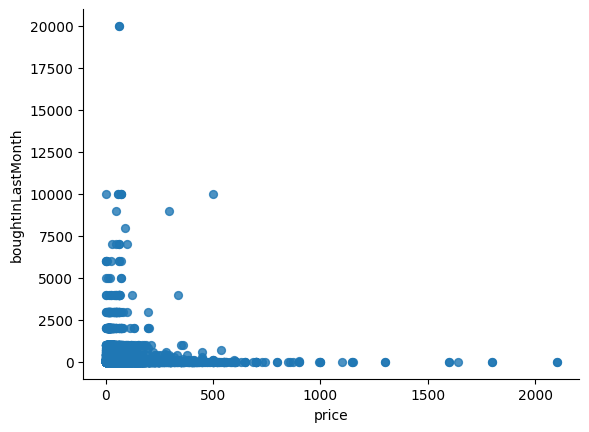

In [8]:
# @title price vs boughtInLastMonth

from matplotlib import pyplot as plt
data1.plot(kind='scatter', x='price', y='boughtInLastMonth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# 3- Cleaning data (remove prices less than 0 and product that were not bought last month

In [9]:
data1 = data1[(data1["boughtInLastMonth"] > 0 )]
data1

,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
321576,Charon's Staircase - Nintendo Switch,2.8,5,34.99,Games & Accessories,False,50
322042,FIFA 21 Legacy Edition - Nintendo Switch,4.5,671,59.55,Games & Accessories,False,100
322587,FIFA 20 Standard Edition - Nintendo Switch,4.6,336,49.99,Games & Accessories,False,100
322695,Fortnite: The Last Laugh Bundle - Nintendo Swi...,4.4,2158,52.00,Games & Accessories,False,100
322875,Labyrinth of Galleria: The Moon Society - Nint...,4.9,26,43.75,Games & Accessories,False,50
...,...,...,...,...,...,...,...
1504241,"2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2D...",4.7,0,6.99,Games & Accessories,False,50
1504254,TNP New Nintendo 3DS XL Hand Grip - Protective...,4.1,0,15.99,Games & Accessories,False,50
1504267,HEIYING Game Card Case for Nintendo Switch& Sw...,4.8,0,16.99,Games & Accessories,False,50
1504614,Sonic & All-Stars Racing Transformed - Nintend...,4.4,0,34.99,Games & Accessories,False,100


In [10]:
data1 = data1[(data1["price"] > 0 )]
data1

,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
321576,Charon's Staircase - Nintendo Switch,2.8,5,34.99,Games & Accessories,False,50
322042,FIFA 21 Legacy Edition - Nintendo Switch,4.5,671,59.55,Games & Accessories,False,100
322587,FIFA 20 Standard Edition - Nintendo Switch,4.6,336,49.99,Games & Accessories,False,100
322695,Fortnite: The Last Laugh Bundle - Nintendo Swi...,4.4,2158,52.00,Games & Accessories,False,100
322875,Labyrinth of Galleria: The Moon Society - Nint...,4.9,26,43.75,Games & Accessories,False,50
...,...,...,...,...,...,...,...
1504241,"2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2D...",4.7,0,6.99,Games & Accessories,False,50
1504254,TNP New Nintendo 3DS XL Hand Grip - Protective...,4.1,0,15.99,Games & Accessories,False,50
1504267,HEIYING Game Card Case for Nintendo Switch& Sw...,4.8,0,16.99,Games & Accessories,False,50
1504614,Sonic & All-Stars Racing Transformed - Nintend...,4.4,0,34.99,Games & Accessories,False,100


In [11]:
cc = data1['isBestSeller'].value_counts()
cc

False    9069
True       40
Name: isBestSeller, dtype: int64

In [12]:
data1['isBestSeller'] = data1['isBestSeller'].astype(int)
data1

<ipython-input-12-a143550f8f2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['isBestSeller'] = data1['isBestSeller'].astype(int)


,title,stars,reviews,price,category,isBestSeller,boughtInLastMonth
321576,Charon's Staircase - Nintendo Switch,2.8,5,34.99,Games & Accessories,0,50
322042,FIFA 21 Legacy Edition - Nintendo Switch,4.5,671,59.55,Games & Accessories,0,100
322587,FIFA 20 Standard Edition - Nintendo Switch,4.6,336,49.99,Games & Accessories,0,100
322695,Fortnite: The Last Laugh Bundle - Nintendo Swi...,4.4,2158,52.00,Games & Accessories,0,100
322875,Labyrinth of Galleria: The Moon Society - Nint...,4.9,26,43.75,Games & Accessories,0,50
...,...,...,...,...,...,...,...
1504241,"2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2D...",4.7,0,6.99,Games & Accessories,0,50
1504254,TNP New Nintendo 3DS XL Hand Grip - Protective...,4.1,0,15.99,Games & Accessories,0,50
1504267,HEIYING Game Card Case for Nintendo Switch& Sw...,4.8,0,16.99,Games & Accessories,0,50
1504614,Sonic & All-Stars Racing Transformed - Nintend...,4.4,0,34.99,Games & Accessories,0,100


In [13]:
cc = data1['isBestSeller'].value_counts()
cc

0    9069
1      40
Name: isBestSeller, dtype: int64

# 4- Vectorize keywords in product title

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [15]:
# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')

In [16]:
tt = data1['title'].values
tt

array(["Charon's Staircase - Nintendo Switch",
       'FIFA 21 Legacy Edition - Nintendo Switch',
       'FIFA 20 Standard Edition - Nintendo Switch', ...,
       'HEIYING Game Card Case for Nintendo Switch& Switch OLED& Switch Lite,Portable Switch Game Memory Card Storage with 24 Game Card Slots and 24 Micro SD Card Slots.',
       'Sonic & All-Stars Racing Transformed - Nintendo 3DS',
       '1 Piece for Pokeman Series Game Cards (Heartgold Version),Third Party Cards Compatible with NDS/NDSI/NDSL/3DS'],
      dtype=object)

In [17]:

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd

countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')

count_wm = countvectorizer.fit_transform(tt)

count_tokens = countvectorizer.get_feature_names_out()

df_countvect = pd.DataFrame(data = count_wm.toarray(),index = tt, columns = count_tokens)

print(df_countvect)


                                                    00  000  0003hcm0178  \
Charon's Staircase - Nintendo Switch                 0    0            0   
FIFA 21 Legacy Edition - Nintendo Switch             0    0            0   
FIFA 20 Standard Edition - Nintendo Switch           0    0            0   
Fortnite: The Last Laugh Bundle - Nintendo Swit...   0    0            0   
Labyrinth of Galleria: The Moon Society - Ninte...   0    0            0   
...                                                 ..  ...          ...   
2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2DS...   0    0            0   
TNP New Nintendo 3DS XL Hand Grip - Protective ...   0    0            0   
HEIYING Game Card Case for Nintendo Switch& Swi...   0    0            0   
Sonic & All-Stars Racing Transformed - Nintendo...   0    0            0   
1 Piece for Pokeman Series Game Cards (Heartgol...   0    0            0   

                                                    000pcs  001  001800  \
Charon's Sta

In [18]:
relevent = []
for a in count_tokens:
  if sum(df_countvect[a]) > 5 :
    relevent.append(a)

relevent

['000',
 '001',
 '01',
 '010',
 '02',
 '020',
 '025',
 '030',
 '06',
 '10',
 '100',
 '1000',
 '100ct',
 '100pcs',
 '106',
 '10pcs',
 '10x',
 '11',
 '112',
 '1188',
 '12',
 '120',
 '120pcs',
 '123',
 '12mm',
 '13',
 '14',
 '144',
 '15',
 '150',
 '1546',
 '16',
 '166',
 '16mm',
 '17',
 '172',
 '18',
 '180',
 '1800',
 '180pcs',
 '185',
 '189',
 '1920s',
 '19mm',
 '1st',
 '1x',
 '20',
 '200',
 '2017',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '203',
 '21',
 '22',
 '23',
 '24',
 '240',
 '25',
 '250',
 '25mm',
 '25th',
 '26',
 '27',
 '28',
 '28mm',
 '29',
 '2ds',
 '2k23',
 '2nd',
 '2pcs',
 '30',
 '300',
 '31',
 '32',
 '32mm',
 '35',
 '36',
 '360',
 '38',
 '3d',
 '3ds',
 '3oz',
 '3rd',
 '3x',
 '40',
 '400',
 '40k',
 '40mm',
 '41',
 '42',
 '45',
 '48',
 '48pcs',
 '4ft',
 '4g',
 '4ghz',
 '4k',
 '4pcs',
 '50',
 '500',
 '50mm',
 '52',
 '54',
 '55',
 '550',
 '56',
 '5e',
 '5ft',
 '5mm',
 '5th',
 '5â',
 '60',
 '600',
 '64',
 '6pcs',
 '6â',
 '70',
 '72',
 '75',
 '7pcs',
 '80',
 '83cm',
 '84',
 '

In [19]:
len(relevent)

2478

In [20]:
df_countvect[relevent]

,000,001,01,010,02,020,025,030,06,10,...,yugioh,zelda,zenith,zero,zipper,zone,zoo,zygomatic,³ã,ï¼
Charon's Staircase - Nintendo Switch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FIFA 21 Legacy Edition - Nintendo Switch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FIFA 20 Standard Edition - Nintendo Switch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fortnite: The Last Laugh Bundle - Nintendo Switch [Code in Box],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Labyrinth of Galleria: The Moon Society - Nintendo Switch,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2DS, FENGWANGLI Plastic Touch Pen Set(5 Colors Available)",0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TNP New Nintendo 3DS XL Hand Grip - Protective Cover Skin Controller Grip Case Ergonomic Comfort Anti Slip Handle Console Grip with Kick-Stand for New Nintendo 3DS XL LL 2015 Model,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"HEIYING Game Card Case for Nintendo Switch& Switch OLED& Switch Lite,Portable Switch Game Memory Card Storage with 24 Game Card Slots and 24 Micro SD Card Slots.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sonic & All-Stars Racing Transformed - Nintendo 3DS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data2 = pd.DataFrame({
    "title": data1["title"].values,
    "stars": data1["stars"].values,
    "reviews": data1["reviews"].values,
    "price": data1["price"].values,
    "isBestSeller": data1["isBestSeller"].values,
    "boughtInLastMonth": data1["boughtInLastMonth"].values,
}, index=data1["title"])
data2

,title,stars,reviews,price,isBestSeller,boughtInLastMonth
title,,,,,,
Charon's Staircase - Nintendo Switch,Charon's Staircase - Nintendo Switch,2.8,5,34.99,0,50
FIFA 21 Legacy Edition - Nintendo Switch,FIFA 21 Legacy Edition - Nintendo Switch,4.5,671,59.55,0,100
FIFA 20 Standard Edition - Nintendo Switch,FIFA 20 Standard Edition - Nintendo Switch,4.6,336,49.99,0,100
Fortnite: The Last Laugh Bundle - Nintendo Switch [Code in Box],Fortnite: The Last Laugh Bundle - Nintendo Swi...,4.4,2158,52.00,0,100
Labyrinth of Galleria: The Moon Society - Nintendo Switch,Labyrinth of Galleria: The Moon Society - Nint...,4.9,26,43.75,0,50
...,...,...,...,...,...,...
"2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2DS, FENGWANGLI Plastic Touch Pen Set(5 Colors Available)","2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2D...",4.7,0,6.99,0,50
TNP New Nintendo 3DS XL Hand Grip - Protective Cover Skin Controller Grip Case Ergonomic Comfort Anti Slip Handle Console Grip with Kick-Stand for New Nintendo 3DS XL LL 2015 Model,TNP New Nintendo 3DS XL Hand Grip - Protective...,4.1,0,15.99,0,50
"HEIYING Game Card Case for Nintendo Switch& Switch OLED& Switch Lite,Portable Switch Game Memory Card Storage with 24 Game Card Slots and 24 Micro SD Card Slots.",HEIYING Game Card Case for Nintendo Switch& Sw...,4.8,0,16.99,0,50


In [22]:
df = pd.concat([data2, df_countvect[relevent]], axis=1)
df

,title,stars,reviews,price,isBestSeller,boughtInLastMonth,000,001,01,010,...,yugioh,zelda,zenith,zero,zipper,zone,zoo,zygomatic,³ã,ï¼
Charon's Staircase - Nintendo Switch,Charon's Staircase - Nintendo Switch,2.8,5,34.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FIFA 21 Legacy Edition - Nintendo Switch,FIFA 21 Legacy Edition - Nintendo Switch,4.5,671,59.55,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FIFA 20 Standard Edition - Nintendo Switch,FIFA 20 Standard Edition - Nintendo Switch,4.6,336,49.99,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fortnite: The Last Laugh Bundle - Nintendo Switch [Code in Box],Fortnite: The Last Laugh Bundle - Nintendo Swi...,4.4,2158,52.00,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Labyrinth of Galleria: The Moon Society - Nintendo Switch,Labyrinth of Galleria: The Moon Society - Nint...,4.9,26,43.75,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2DS, FENGWANGLI Plastic Touch Pen Set(5 Colors Available)","2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2D...",4.7,0,6.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TNP New Nintendo 3DS XL Hand Grip - Protective Cover Skin Controller Grip Case Ergonomic Comfort Anti Slip Handle Console Grip with Kick-Stand for New Nintendo 3DS XL LL 2015 Model,TNP New Nintendo 3DS XL Hand Grip - Protective...,4.1,0,15.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"HEIYING Game Card Case for Nintendo Switch& Switch OLED& Switch Lite,Portable Switch Game Memory Card Storage with 24 Game Card Slots and 24 Micro SD Card Slots.",HEIYING Game Card Case for Nintendo Switch& Sw...,4.8,0,16.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sonic & All-Stars Racing Transformed - Nintendo 3DS,Sonic & All-Stars Racing Transformed - Nintend...,4.4,0,34.99,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 5- Choose Corolated vectors

In [23]:
cr = df.corr()['price']
cr

<ipython-input-23-c1c42d1d856b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr = df.corr()['price']


stars               -0.104937
reviews              0.127286
price                1.000000
isBestSeller         0.018278
boughtInLastMonth    0.079415
                       ...   
zone                -0.004303
zoo                 -0.008563
zygomatic           -0.016985
³ã                   0.012127
ï¼                  -0.011287
Name: price, Length: 2483, dtype: float64

In [24]:
cr2 = abs(cr)
cr2 = cr2.sort_values()
cr2

resident    0.000001
slots       0.000013
2019        0.000028
standard    0.000038
updated     0.000092
              ...   
racing      0.220653
renewed     0.224523
pc          0.231709
cockpit     0.258075
price       1.000000
Name: price, Length: 2483, dtype: float64

In [25]:
cr2 = pd.DataFrame(cr2)
cr2

,price
resident,0.000001
slots,0.000013
2019,0.000028
standard,0.000038
updated,0.000092
...,...
racing,0.220653
renewed,0.224523
pc,0.231709
cockpit,0.258075


In [26]:
cr3 = cr2[(cr2["price"] > 0.07)]
cr3

,price
tears,0.070175
360,0.070345
ps5,0.070792
horizons,0.070984
commander,0.071181
...,...
racing,0.220653
renewed,0.224523
pc,0.231709
cockpit,0.258075


In [27]:
relevent_values = cr3.index.values
relevent_values

array(['tears', '360', 'ps5', 'horizons', 'commander', 'pro', 'masters',
       'family', 'playstation', 'speakers', 'lord', 'bluetooth', 'tales',
       'fun', 'earth', 'premium', 'party', 'dice', 'boughtInLastMonth',
       'mic', 'cards', 'clearcast', '50mm', 'turtle', '000', 'force',
       'topper', 'playing', 'gen', 'tall', 'v2', 'workshop', 'steering',
       'model', 'card', 'neon', 'simulator', 'kids', 'edition', '001',
       '4k', 'warhammer', 'mobile', 'hi', 'stars', 'fi', 'collector',
       'drivers', 'gathering', 'horizon', 'paddle', 'headset', 'magic',
       'nova', 'steelseries', 'stealth', 'forza', 'game', 'booster',
       'wheel', 'packs', 'wireless', 'level', 'shifters', 'gt', 'arctis',
       'reviews', 'series', 'xbox', 'ps4', 'feedback', 'pedals', 'nlr',
       'thrustmaster', 'racing', 'renewed', 'pc', 'cockpit', 'price'],
      dtype=object)

In [28]:
relevant_values1 = [value for value in relevent_values if value not in ['boughtInLastMonth', 'reviews', 'price', 'title', 'stars']]
relevant_values1

['tears',
 '360',
 'ps5',
 'horizons',
 'commander',
 'pro',
 'masters',
 'family',
 'playstation',
 'speakers',
 'lord',
 'bluetooth',
 'tales',
 'fun',
 'earth',
 'premium',
 'party',
 'dice',
 'mic',
 'cards',
 'clearcast',
 '50mm',
 'turtle',
 '000',
 'force',
 'topper',
 'playing',
 'gen',
 'tall',
 'v2',
 'workshop',
 'steering',
 'model',
 'card',
 'neon',
 'simulator',
 'kids',
 'edition',
 '001',
 '4k',
 'warhammer',
 'mobile',
 'hi',
 'fi',
 'collector',
 'drivers',
 'gathering',
 'horizon',
 'paddle',
 'headset',
 'magic',
 'nova',
 'steelseries',
 'stealth',
 'forza',
 'game',
 'booster',
 'wheel',
 'packs',
 'wireless',
 'level',
 'shifters',
 'gt',
 'arctis',
 'series',
 'xbox',
 'ps4',
 'feedback',
 'pedals',
 'nlr',
 'thrustmaster',
 'racing',
 'renewed',
 'pc',
 'cockpit']

In [29]:
clean_data = pd.concat([data2, df_countvect[relevant_values1]], axis=1)
clean_data

,title,stars,reviews,price,isBestSeller,boughtInLastMonth,tears,360,ps5,horizons,...,xbox,ps4,feedback,pedals,nlr,thrustmaster,racing,renewed,pc,cockpit
Charon's Staircase - Nintendo Switch,Charon's Staircase - Nintendo Switch,2.8,5,34.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FIFA 21 Legacy Edition - Nintendo Switch,FIFA 21 Legacy Edition - Nintendo Switch,4.5,671,59.55,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FIFA 20 Standard Edition - Nintendo Switch,FIFA 20 Standard Edition - Nintendo Switch,4.6,336,49.99,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fortnite: The Last Laugh Bundle - Nintendo Switch [Code in Box],Fortnite: The Last Laugh Bundle - Nintendo Swi...,4.4,2158,52.00,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Labyrinth of Galleria: The Moon Society - Nintendo Switch,Labyrinth of Galleria: The Moon Society - Nint...,4.9,26,43.75,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2DS, FENGWANGLI Plastic Touch Pen Set(5 Colors Available)","2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2D...",4.7,0,6.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TNP New Nintendo 3DS XL Hand Grip - Protective Cover Skin Controller Grip Case Ergonomic Comfort Anti Slip Handle Console Grip with Kick-Stand for New Nintendo 3DS XL LL 2015 Model,TNP New Nintendo 3DS XL Hand Grip - Protective...,4.1,0,15.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"HEIYING Game Card Case for Nintendo Switch& Switch OLED& Switch Lite,Portable Switch Game Memory Card Storage with 24 Game Card Slots and 24 Micro SD Card Slots.",HEIYING Game Card Case for Nintendo Switch& Sw...,4.8,0,16.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sonic & All-Stars Racing Transformed - Nintendo 3DS,Sonic & All-Stars Racing Transformed - Nintend...,4.4,0,34.99,0,100,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
clean_data['stars'].fillna(-1, inplace=True)
clean_data

,title,stars,reviews,price,isBestSeller,boughtInLastMonth,tears,360,ps5,horizons,...,xbox,ps4,feedback,pedals,nlr,thrustmaster,racing,renewed,pc,cockpit
Charon's Staircase - Nintendo Switch,Charon's Staircase - Nintendo Switch,2.8,5,34.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FIFA 21 Legacy Edition - Nintendo Switch,FIFA 21 Legacy Edition - Nintendo Switch,4.5,671,59.55,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FIFA 20 Standard Edition - Nintendo Switch,FIFA 20 Standard Edition - Nintendo Switch,4.6,336,49.99,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fortnite: The Last Laugh Bundle - Nintendo Switch [Code in Box],Fortnite: The Last Laugh Bundle - Nintendo Swi...,4.4,2158,52.00,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Labyrinth of Galleria: The Moon Society - Nintendo Switch,Labyrinth of Galleria: The Moon Society - Nint...,4.9,26,43.75,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2DS, FENGWANGLI Plastic Touch Pen Set(5 Colors Available)","2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2D...",4.7,0,6.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TNP New Nintendo 3DS XL Hand Grip - Protective Cover Skin Controller Grip Case Ergonomic Comfort Anti Slip Handle Console Grip with Kick-Stand for New Nintendo 3DS XL LL 2015 Model,TNP New Nintendo 3DS XL Hand Grip - Protective...,4.1,0,15.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"HEIYING Game Card Case for Nintendo Switch& Switch OLED& Switch Lite,Portable Switch Game Memory Card Storage with 24 Game Card Slots and 24 Micro SD Card Slots.",HEIYING Game Card Case for Nintendo Switch& Sw...,4.8,0,16.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sonic & All-Stars Racing Transformed - Nintendo 3DS,Sonic & All-Stars Racing Transformed - Nintend...,4.4,0,34.99,0,100,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# 6- Remove outliers

In [31]:
clean_data.describe()

,stars,reviews,price,isBestSeller,boughtInLastMonth,tears,360,ps5,horizons,commander,...,xbox,ps4,feedback,pedals,nlr,thrustmaster,racing,renewed,pc,cockpit
count,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,...,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000,9109.000000
mean,4.404732,5.217148,31.096065,0.004391,267.378417,0.002086,0.002635,0.041497,0.001427,0.010759,...,0.076847,0.012076,0.000659,0.001757,0.000768,0.003623,0.009441,0.003842,0.017455,0.000768
std,0.845847,260.203858,37.842127,0.066125,622.366123,0.045626,0.051265,0.243563,0.037753,0.115235,...,0.380146,0.120692,0.025658,0.041876,0.027712,0.074742,0.114394,0.061871,0.134279,0.031425
min,0.000000,0.000000,1.400000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.400000,0.000000,14.100000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.600000,0.000000,22.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.700000,0.000000,34.990000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,24003.000000,899.990000,1.000000,20000.000000,1.000000,1.000000,4.000000,1.000000,2.000000,...,6.000000,3.000000,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000,2.000000,2.000000


<Axes: ylabel='price'>

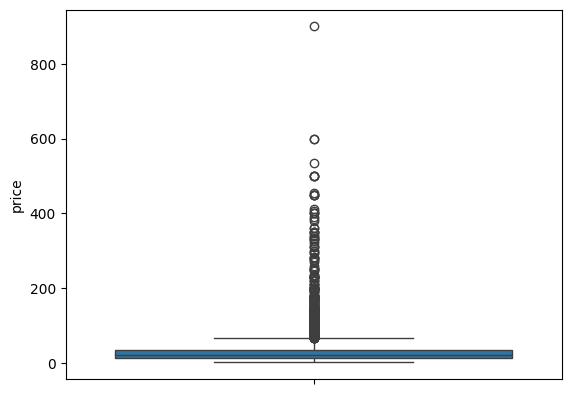

In [32]:
import seaborn as sns
sns.boxplot(clean_data['price'])

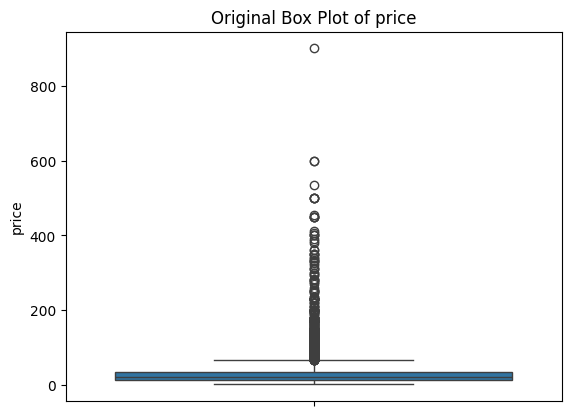

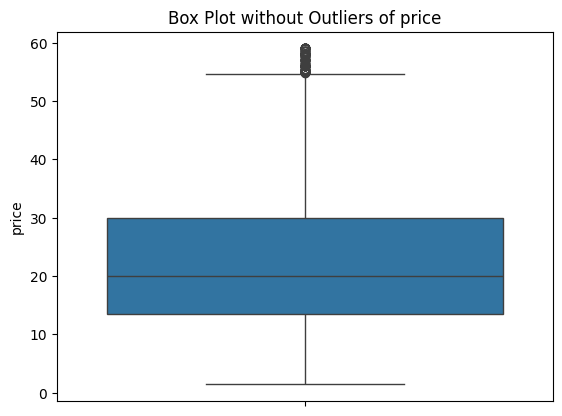

,title,stars,reviews,price,isBestSeller,boughtInLastMonth,tears,360,ps5,horizons,...,xbox,ps4,feedback,pedals,nlr,thrustmaster,racing,renewed,pc,cockpit
Charon's Staircase - Nintendo Switch,Charon's Staircase - Nintendo Switch,2.8,5,34.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FIFA 20 Standard Edition - Nintendo Switch,FIFA 20 Standard Edition - Nintendo Switch,4.6,336,49.99,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fortnite: The Last Laugh Bundle - Nintendo Switch [Code in Box],Fortnite: The Last Laugh Bundle - Nintendo Swi...,4.4,2158,52.00,0,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Labyrinth of Galleria: The Moon Society - Nintendo Switch,Labyrinth of Galleria: The Moon Society - Nint...,4.9,26,43.75,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mario Kart 8 Deluxe - US Version,Mario Kart 8 Deluxe - US Version,4.9,0,48.12,0,9000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2DS, FENGWANGLI Plastic Touch Pen Set(5 Colors Available)","2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2D...",4.7,0,6.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TNP New Nintendo 3DS XL Hand Grip - Protective Cover Skin Controller Grip Case Ergonomic Comfort Anti Slip Handle Console Grip with Kick-Stand for New Nintendo 3DS XL LL 2015 Model,TNP New Nintendo 3DS XL Hand Grip - Protective...,4.1,0,15.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"HEIYING Game Card Case for Nintendo Switch& Switch OLED& Switch Lite,Portable Switch Game Memory Card Storage with 24 Game Card Slots and 24 Micro SD Card Slots.",HEIYING Game Card Case for Nintendo Switch& Sw...,4.8,0,16.99,0,50,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sonic & All-Stars Racing Transformed - Nintendo 3DS,Sonic & All-Stars Racing Transformed - Nintend...,4.4,0,34.99,0,100,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


def removal_box_plot(df, column, threshold):
	sns.boxplot(df[column])
	plt.title(f'Original Box Plot of {column}')
	plt.show()

	removed_outliers = df[df[column] <= threshold]

	sns.boxplot(removed_outliers[column])
	plt.title(f'Box Plot without Outliers of {column}')
	plt.show()
	return removed_outliers


threshold_value = 59

no_outliers = removal_box_plot(clean_data, 'price', threshold_value)

removed_outliers = clean_data[clean_data['price'] <= threshold_value]
removed_outliers

<ipython-input-34-b159937e8ebf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clean_data['price'])


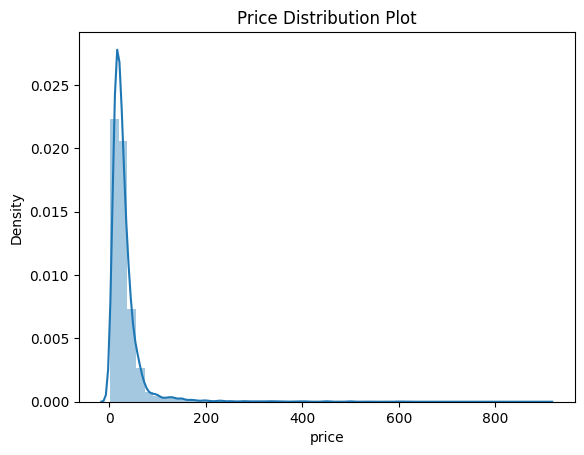

In [34]:
import seaborn as sns

plt.title('Price Distribution Plot')
sns.distplot(clean_data['price'])
plt.show()

<ipython-input-35-9391aca0f6b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removed_outliers['price'])


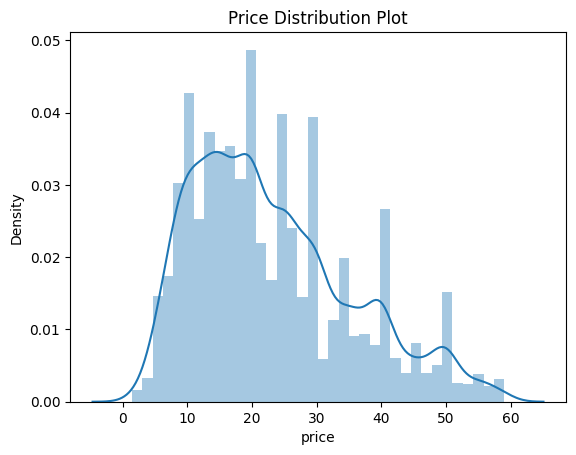

In [35]:
plt.title('Price Distribution Plot')
sns.distplot(removed_outliers['price'])
plt.show()

# 7- Build the ML algo

In [119]:
y = pd.DataFrame(clean_data['price'])
y2 = pd.DataFrame(removed_outliers['price'])
X = clean_data.drop(['price', 'title'], axis=1)
X2 = removed_outliers.drop(['price', 'title'], axis=1)

X

,stars,reviews,isBestSeller,boughtInLastMonth,tears,360,ps5,horizons,commander,pro,...,xbox,ps4,feedback,pedals,nlr,thrustmaster,racing,renewed,pc,cockpit
Charon's Staircase - Nintendo Switch,2.8,5,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FIFA 21 Legacy Edition - Nintendo Switch,4.5,671,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FIFA 20 Standard Edition - Nintendo Switch,4.6,336,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fortnite: The Last Laugh Bundle - Nintendo Switch [Code in Box],4.4,2158,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Labyrinth of Galleria: The Moon Society - Nintendo Switch,4.9,26,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"2DS Stylus, 10 Pcs Stylus Pens for Nintendo 2DS, FENGWANGLI Plastic Touch Pen Set(5 Colors Available)",4.7,0,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TNP New Nintendo 3DS XL Hand Grip - Protective Cover Skin Controller Grip Case Ergonomic Comfort Anti Slip Handle Console Grip with Kick-Stand for New Nintendo 3DS XL LL 2015 Model,4.1,0,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"HEIYING Game Card Case for Nintendo Switch& Switch OLED& Switch Lite,Portable Switch Game Memory Card Storage with 24 Game Card Slots and 24 Micro SD Card Slots.",4.8,0,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sonic & All-Stars Racing Transformed - Nintendo 3DS,4.4,0,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [120]:
t = pd.DataFrame(y)
t.shape

(9109, 1)

In [121]:
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state = 0)



In [122]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

LinearRegression()

In [123]:
X_train

,stars,reviews,isBestSeller,boughtInLastMonth,tears,360,ps5,horizons,commander,pro,...,xbox,ps4,feedback,pedals,nlr,thrustmaster,racing,renewed,pc,cockpit
Hyrule Warriors: Age of Calamity (Nintendo Switch),4.7,0,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
My Little Pony: A Maretime Bay Adventure - Standard - Xbox [Digital Code],4.4,0,0,1000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1953 Trivia Playing Cards: Great 70th Birthday,4.5,0,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pokemon - Reshiram & Charizard Tag Team GX - 20/214 - Ultra Rare - Unbroken Bonds,4.7,0,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GeekShare Soft Silicone Protective Case Compatible with Nintendo Switch Console (Purple),4.7,0,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mansions of Madness 2nd Edition Board Game (BASE GAME) | Horror Game | Mystery Board Game for Teens and Adults | Ages 14 and up | 1-5 Players | Average Playtime 2-3 hrs | Made by Fantasy Flight Games,4.7,0,0,200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alligator Dentist Game Alligator Teeth Game Large Crocodile Teeth Toys Game for Kids Alligator Game with Teeth Crocodile Toy Travel Game (Big Crocodile),4.0,0,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"eeBoo: United States Geography Bingo Game, for 2 to 6 Players, Includes 6 Game Cards, 84 Playing Cards, & Drawstring Bag, For Ages 5 and up",4.5,0,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Ridley's Avocado Smash! 71 Piece Family Action Card Game with Storage Case,1 ea",4.8,0,0,300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

y_pred_test2 = regressor.predict(X_test2)     # predicted value of y_test
y_pred_train2 = regressor.predict(X_train2)   # predicted value of y_train

In [125]:
import matplotlib.pyplot as plt

score_test = regressor.score(X_test, y_test)
score_train = regressor.score(X_train, y_train)

score_test2 = regressor.score(X_test2, y_test2)
score_train2 = regressor.score(X_train2, y_train2)
print('initial data')
print("Train Score is :", score_train)
print("Test Score is :", score_test)

print('Data without outlier')
print("Train Score is :", score_train2)
print("Test Score is :", score_test2)

initial data
Train Score is : 0.3852293259520856
Test Score is : 0.1302289625662264
Data without outlier
Train Score is : -0.9058266686883587
Test Score is : -0.9177556352350447


In [126]:
y2 = np.reshape(y_pred_train, -1)
y2

array([25.76044226, 31.8139098 , 20.88556461, ..., 18.17687635,
       22.2906142 , 33.2698813 ])

In [127]:
y_test = np.reshape(y_test.values, -1)
y_pred_test = np.reshape(y_pred_test, -1)

y_test2 = np.reshape(y_test2.values, -1)
y_pred_test2 = np.reshape(y_pred_test2, -1)

In [128]:
y_test

array([59.99, 30.52, 42.99, ..., 29.99, 16.5 , 39.99])

In [129]:
import numpy as np
import pandas as pd

y_pred_test = regressor.predict(X_test)

compare = pd.DataFrame({
    "actual values": np.reshape(y_test, -1),
    "predicted values": np.reshape(y_pred_test, -1),
})
compare

,actual values,predicted values
0,59.99,53.059572
1,30.52,240.767343
2,42.99,26.127907
3,29.99,12.885015
4,49.99,43.321120
...,...,...
1817,12.99,26.127907
1818,28.48,26.022688
1819,29.99,18.564332
1820,16.50,35.916958


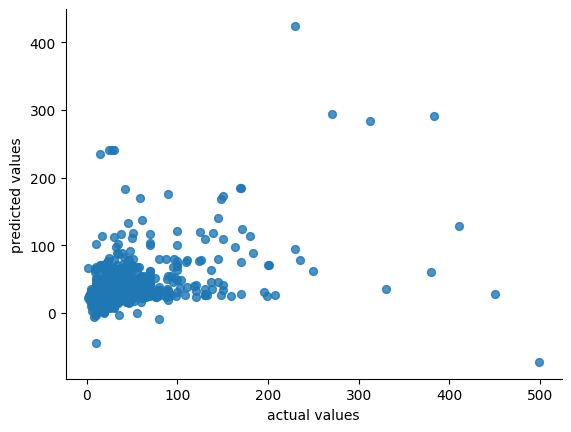

In [130]:
from matplotlib import pyplot as plt
compare.plot(kind='scatter', x='actual values', y='predicted values', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [131]:
y_pred_test2 = regressor2.predict(X_test2)

compare2 = pd.DataFrame({
    "actual values": np.reshape(y_test2, -1),
    "predicted values": np.reshape(y_pred_test2, -1),
})
compare2

,actual values,predicted values
0,24.99,19.514898
1,29.97,23.219847
2,19.77,21.731728
3,26.78,23.069250
4,5.99,23.538684
...,...,...
1654,29.95,22.918653
1655,14.99,11.955451
1656,30.92,24.084427
1657,19.99,20.180790


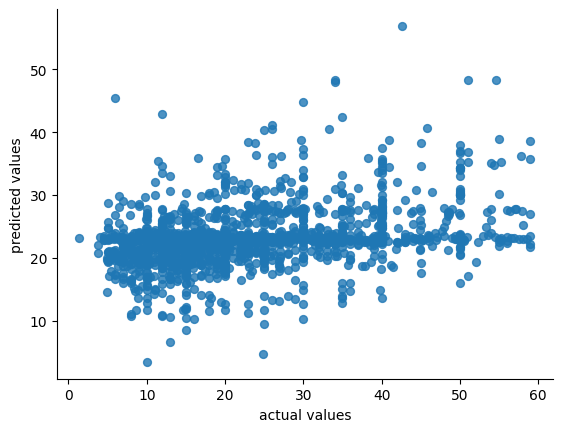

In [132]:
from matplotlib import pyplot as plt
compare2.plot(kind='scatter', x='actual values', y='predicted values', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [133]:
from sklearn.metrics import r2_score
score = r2_score(compare["actual values"], compare["predicted values"])
print("The accuracy of our model 1 is {}%".format(round(score, 2) *100))

score2 = r2_score(compare2["actual values"], compare2["predicted values"])
print("The accuracy of our model 2 is {}%".format(round(score2, 2) *100))

The accuracy of our model 1 is 13.0%
The accuracy of our model 2 is 11.0%


In [134]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(compare["actual values"], compare["predicted values"])
print("The Mean Absolute Error of Model 1 is {}".format(round(score, 2)))

score2 = mean_absolute_error(compare2["actual values"], compare2["predicted values"])
print("The Mean Absolute Error of Model 2 is {}".format(round(score2, 2)))

The Mean Absolute Error of Model 1 is 16.81
The Mean Absolute Error of Model 2 is 9.38


In [135]:
from sklearn.metrics import mean_squared_error
import numpy as np
score = np.sqrt(mean_absolute_error(compare["actual values"], compare["predicted values"]))
print("The Mean Absolute Error of Model 1 is {}".format(round(score, 2)))

score2 = np.sqrt(mean_absolute_error(compare2["actual values"], compare2["predicted values"]))
print("The Mean Absolute Error of Model 2 is {}".format(round(score2, 2)))

The Mean Absolute Error of Model 1 is 4.1
The Mean Absolute Error of Model 2 is 3.06


In [136]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

# fit model no training data
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=3, n_repeats=30, random_state=1)
# evaluate model

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )



Mean MAE: 15.130 (0.355)


In [137]:
regressor2.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [138]:
import joblib

# save
joblib.dump(regressor2, "model.pkl")

['model.pkl']

In [150]:
title_vectors = regressor2.feature_names_in_
title_vectors = [value for value in title_vectors if value not in ['stars', 'reviews', 'isBestSeller', 'boughtInLastMonth']]


def vector_count(title, vectors):
  wordcount = []
  for vector in vectors :
    count = title.count(vector)
    wordcount.append(count)

  return wordcount

def predict_price(title: str, stars: float, reviews: int, isBestSeller: bool, boughtInLastMonth: int) -> None:
    if not isinstance(title, str):
        raise ValueError('Title cannot be empty')

    if not isinstance(stars, float):
        raise ValueError('Stars must be a float')
    elif not 0 <= stars <= 5:
        raise ValueError('Stars must be between 0 and 5')

    if not isinstance(reviews, int) or reviews < 0:
        raise ValueError('Reviews must be a non-negative integer')

    if not isinstance(isBestSeller, bool):
        raise ValueError('isBestSeller must be a boolean value')

    if not isinstance(boughtInLastMonth, int) or boughtInLastMonth < 0:
        raise ValueError('boughtInLastMonth must be a non-negative integer')

    count = vector_count(title, title_vectors)
    X = [stars, reviews, isBestSeller, boughtInLastMonth]
    counting = vector_count('premium labor lord mic', title_vectors)
    for val in counting:
      X.append(val)
    X = pd.DataFrame([X], columns=regressor2.feature_names_in_)

    pickled_model = joblib.load(open('model.pkl', 'rb'))
    result = pickled_model.predict(X)

    return result



In [152]:
title = "Carrying Case for Nintendo Switch / New Switch OLED Console & Accessories, Switch Carry Case with Waterproof Soft Lining Protector Hard Shell Home Storage & Travel Box with 10 Games Cartridges Pouch (Red&Blue)"

x = predict_price(title, 5.0, 4, True, 0 )
print(x)

[[33.88203085]]
